In [23]:
from models import unet
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from unet_utils import dice_coef, dice_coef_loss
import tensorflow as tf 
import numpy as np 

In [6]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
model = unet((240,240,1),2)

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 240, 240, 1) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 240, 240, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 240, 240, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 120, 120, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

In [6]:
#plot_model(model, show_shapes=True)

In [9]:
#model.compile(optimizer=Adam(lr=1e-4),loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer=Adam(lr=1e-4),loss=dice_coef_loss, metrics=[dice_coef])

In [10]:
from datagenerator import DataGenerator

In [11]:
path_train = '/home/michael/Desktop/Ceramic_dataset/train'
path_train_a = '/home/michael/Desktop/Ceramic_dataset/trainannot'
path_val = '/home/michael/Desktop/Ceramic_dataset/val'
path_val_a = '/home/michael/Desktop/Ceramic_dataset/valannot'
gen = DataGenerator(path_train,path_train_a,image_size=(240,240), batch_size=2)
val_gen = DataGenerator(path_val,path_val_a,image_size=(240,240), batch_size=2)

In [12]:
#model.fit(gen, epochs=1, validation_data=val_gen, verbose=1)
model.load_weights('weights.h5')

In [13]:
path_test = '/home/michael/Desktop/Ceramic_dataset/test'
path_test_a = '/home/michael/Desktop/Ceramic_dataset/testannot'
gen = DataGenerator(path_test,path_test_a,image_size=(240,240), batch_size=5)

In [11]:
score = model.evaluate(gen)

  ...
    to  
  ['...']
60/60 [==============================] - 450s 8s/step - loss: 0.3167 - accuracy: 0.9428


In [14]:
y = model.predict(gen, verbose=1)

60/60 [==============================] - 284s 5s/step


In [15]:
y.shape 

(300, 240, 240, 2)

In [26]:
np.count_nonzero(y[3,:,:,1]) == y[3,:,:,1].shape[0]*y[3,:,:,1].shape[1]

True

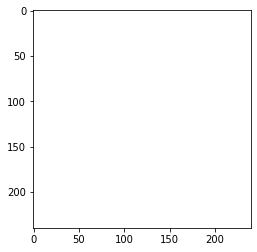

In [22]:
import matplotlib.pyplot as plt 
plt.imshow(y[3,:,:,1], cmap='gray')